## Retrieve Classified Data

In [1]:
import data
from data import DataLoader, DataPaths, DataEncodings
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.data import Dataset
import numpy as np
from tensorflow.errors import ResourceExhaustedError
from tensorflow.data import AUTOTUNE
import tensorflow.keras as ks


2025-04-30 23:26:23.412553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746069983.425956  922428 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746069983.430095  922428 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746069983.441813  922428 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746069983.441826  922428 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746069983.441828  922428 computation_placer.cc:177] computation placer alr

In [14]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
def plot_loss(history):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plot_graphs(history, 'accuracy')
  plt.ylim(None, 1)
  plt.subplot(1, 2, 2)
  plot_graphs(history, 'loss')
  plt.ylim(0, None)

In [ ]:
# Initialize data loader
data_loader = DataLoader()
data_encoder = data.DataEncoder(1000)
# Load spam data
spam_data = data_loader.load_data(DataPaths.SPAM_SALES_DATA)

[nltk_data] Downloading package punkt to /home/oguntola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/oguntola/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oguntola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_loader.raw_text

0        Subject: enron methanol ; meter # : 988291\r\n...
1        Subject: hpl nom for january 9 , 2001\r\n( see...
2        Subject: neon retreat\r\nho ho ho , we ' re ar...
3        Subject: photoshop , windows , office . cheap ...
4        Subject: re : indian springs\r\nthis deal is t...
                               ...                        
19602                             :( but your not here....
19603    Becoz its  &lt;#&gt;  jan whn al the post ofic...
19604    Its a valentine game. . . send dis msg to all ...
19605                                We r outside already.
19606    The Xmas story is peace.. The Xmas msg is love...
Name: text, Length: 19607, dtype: object

In [ ]:

text, is_spam, text_class = data_loader.get_processed_data(concat=False)
cleaned_text = data_loader.get_processed_text_as_strings()
label_encoder = LabelEncoder()


def tensorflow_dataset(data, labels):
    """
    Create a TensorFlow dataset from the text and labels.
    """
    dataset = Dataset.from_tensor_slices((
            data,
            label_encoder.fit_transform(labels)   # Labels
    ))

    train_size = int(len(text) * 0.75)
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)

    # Specify output types
    train_dataset = train_dataset.map(lambda x, y: (x, y))  # Map to appropriate data types
    test_dataset = test_dataset.map(lambda x, y: (x, y))  # Map to appropriate data types
    
    train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    return train_dataset, test_dataset

BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
text

array(["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
       'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
       "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a

## Prepare Model Evaluation

In [7]:
def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    Y_test_array = np.array(Y_test)
    print("Overall accuracy of model:", sum(predictions == Y_test_array) / len(predictions))
    print("Accuracy on classifying spam:", sum(np.where(Y_test_array != "ham", predictions == Y_test_array, 0)) / sum(Y_test_array != "ham"))
    print("Accuracy on identifying ham from spam:", sum(np.where(Y_test == "ham", predictions == Y_test, 0)) / sum(Y_test == "ham"))

# Bag of Words (aka CountVectorizer)

In [8]:
vec_X = data_encoder.vectorize_text_data(text, DataEncodings.COUNT, sparse=True)

I0000 00:00:1746069988.993331  922428 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22395 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746069988.995574  922428 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22395 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:24:00.0, compute capability: 8.6
I0000 00:00:1746069988.997402  922428 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22395 MB memory:  -> device: 2, name: NVIDIA RTX A5000, pci bus id: 0000:41:00.0, compute capability: 8.6
I0000 00:00:1746069988.999248  922428 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22395 MB memory:  -> device: 3, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6
I0000 00:00:1746069989.000726  922428 gpu_device.cc:2019] Created device /job:localh

In [9]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(vec_X, text_class, test_size=0.25)

### Applying Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

Overall accuracy of model: 0.9563443492452061
Accuracy on classifying spam: 0.8105820105820106
Accuracy on identifying ham from spam: 0.991154915339904


### Applying Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), Y_train)
evaluate_model(nb_model, X_test.toarray(), Y_test)

Overall accuracy of model: 0.7549979600163199
Accuracy on classifying spam: 0.7111111111111111
Accuracy on identifying ham from spam: 0.765478898155168


### RNN

In [12]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    ngrams=(1,1),
    output_mode="count",
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


2025-04-30 23:27:30.166485: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1746070052.235062  922878 cuda_dnn.cc:529] Loaded cuDNN version 90300


246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.7797 - loss: 0.8722 - val_accuracy: 0.8089 - val_loss: 0.5745
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7961 - loss: 0.6629 - val_accuracy: 0.8068 - val_loss: 0.5619
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7958 - loss: 0.6476 - val_accuracy: 0.8130 - val_loss: 0.5440
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.7991 - loss: 0.6346 - val_accuracy: 0.8109 - val_loss: 0.5593
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8088 - loss: 0.5878 - val_accuracy: 0.8135 - val_loss: 0.5502
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8139 - loss: 0.5744 - val_accuracy: 0.8141 - val_loss: 0.5337
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8133 - loss: 0.5716 - val_accuracy: 0.8193 - val_loss: 0.5347
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8193 - loss: 0.5492 - val_accurac

Test Loss: 0.5423879623413086
Test Accuracy: 0.8230494856834412


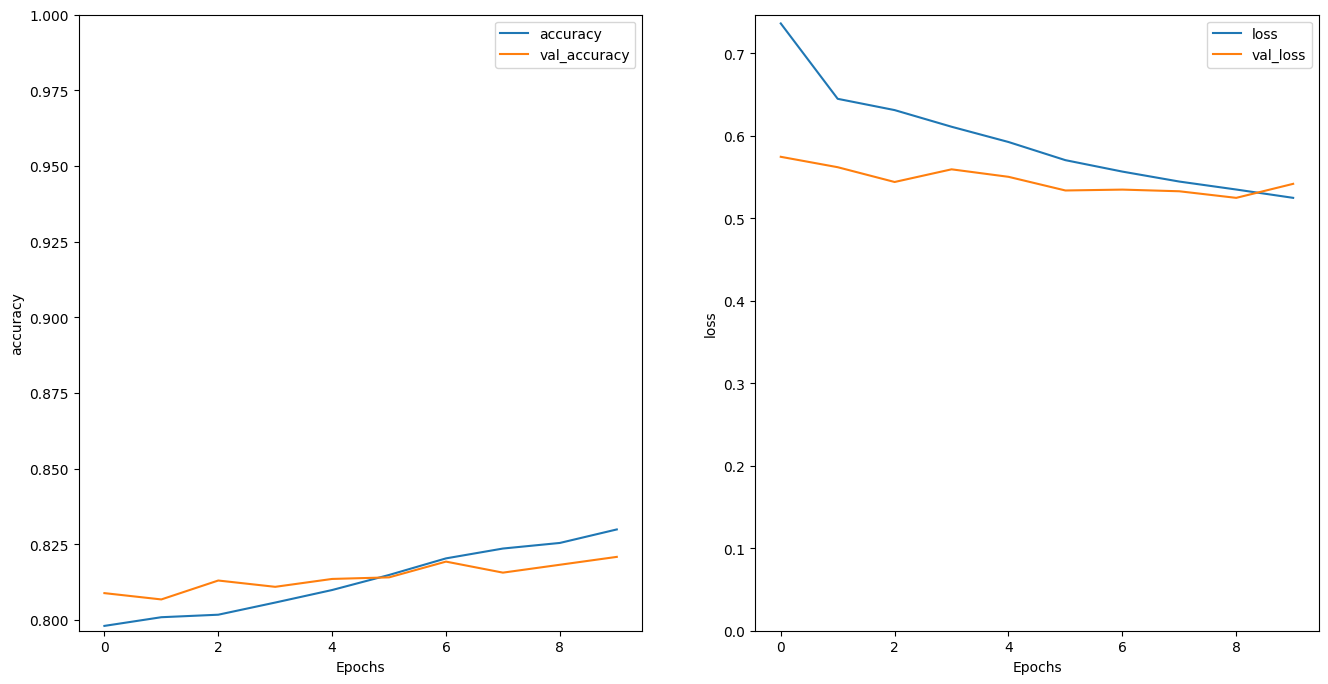

In [15]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# TF-IDF (Term Frequency Inverse Document Frequency)

In [16]:
tf_idf_encoder = data.DataEncoder()

In [17]:
try:
    vec_X = tf_idf_encoder.vectorize_text_data(text, DataEncodings.TFIDF, sparse=False)
except ResourceExhaustedError:
    pass
# print(vectorizer.get_feature_names_out(vec_X))
# print(vectorizer.vocabulary_)
# print(vec_X.shape)
# print(vec_X)

2025-04-30 23:30:59.532150: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.54GiB (rounded to 8097691136)requested by op Cast
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-04-30 23:30:59.532497: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-04-30 23:30:59.532512: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 2601, Chunks in use: 2599. 650.2KiB allocated for chunks. 649.8KiB in use in bin. 11.1KiB client-requested in use in bin.
2025-04-30 23:30:59.532520: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 768B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-04-30 23:30:

In [18]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(vec_X, text_class, test_size=0.25)

### Applying Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

Overall accuracy of model: 0.9563443492452061
Accuracy on classifying spam: 0.8105820105820106
Accuracy on identifying ham from spam: 0.991154915339904


### Applying Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), Y_train)
evaluate_model(nb_model, X_test.toarray(), Y_test)

Overall accuracy of model: 0.7549979600163199
Accuracy on classifying spam: 0.7111111111111111
Accuracy on identifying ham from spam: 0.765478898155168


### RNN

In [21]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="tf_idf",
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7775 - loss: 0.8781 - val_accuracy: 0.8089 - val_loss: 0.5565
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7947 - loss: 0.6628 - val_accuracy: 0.8089 - val_loss: 0.5664
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8006 - loss: 0.6329 - val_accuracy: 0.8109 - val_loss: 0.5555
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8076 - loss: 0.6035 - val_accuracy: 0.8229 - val_loss: 0.5287
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8095 - loss: 0.5833 - val_accuracy: 0.8125 - val_loss: 0.5476
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8143 - loss: 0.5729 - val_accuracy: 0.8281 - val_loss: 0.5143
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8224 - loss: 0.5375 - val_accuracy: 0.8255 - val_loss: 0.4981
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8256 - loss: 0.5223 - 

Test Loss: 0.48395654559135437
Test Accuracy: 0.8424273133277893


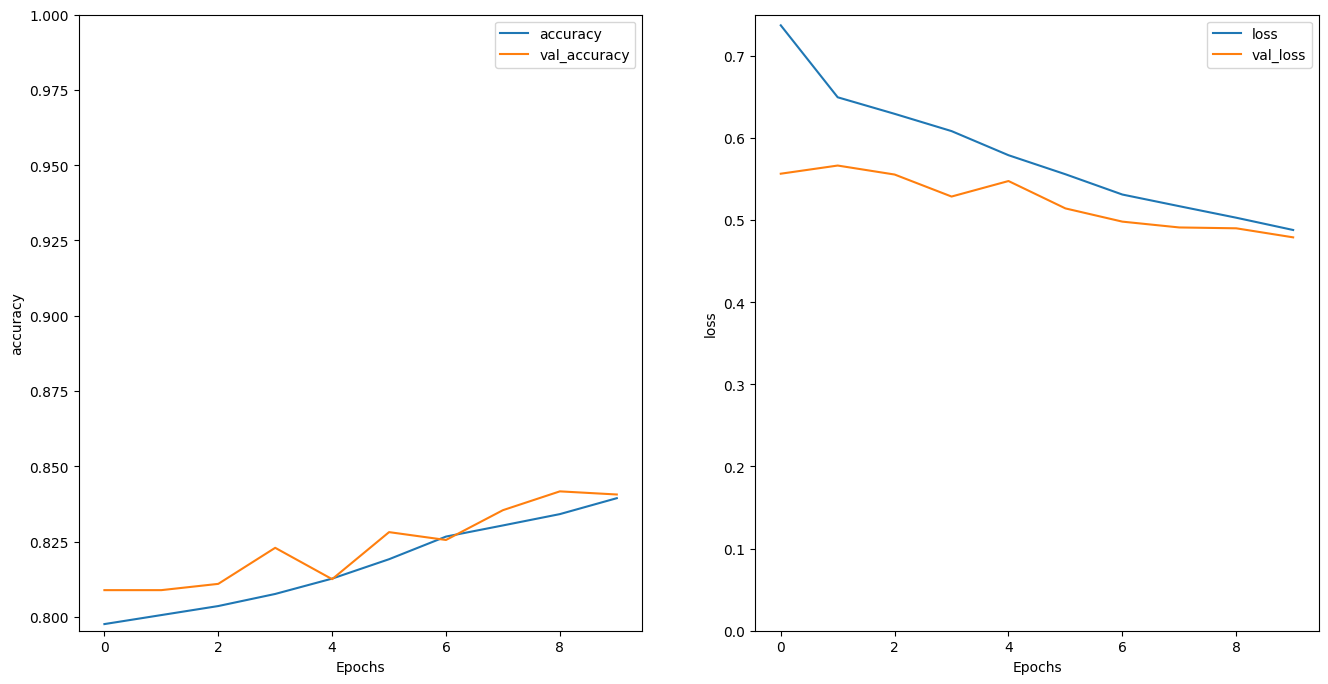

In [22]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# word2vec

In [23]:
data_encoder.train_word2vec_model(cleaned_text)

In [24]:
word2vec_vectors = data_encoder.get_word2vec_vectors(cleaned_text)

In [25]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(word2vec_vectors, text_class, test_size=0.25)

### Applying Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

Overall accuracy of model: 0.8388412892696858
Accuracy on classifying spam: 0.2074074074074074
Accuracy on identifying ham from spam: 0.989638615112459


### Applying Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
evaluate_model(nb_model, X_test, Y_test)

Overall accuracy of model: 0.40452876376988983
Accuracy on classifying spam: 0.27195767195767195
Accuracy on identifying ham from spam: 0.43618903209502147


### RNN

In [28]:
train_dataset, test_dataset = tensorflow_dataset(word2vec_vectors, text_class)

model = ks.Sequential([
    ks.layers.Embedding(
        input_dim=data_encoder.word2vec_model.vector_size,
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7761 - loss: 0.8858 - val_accuracy: 0.8089 - val_loss: 0.7345
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7900 - loss: 0.7742 - val_accuracy: 0.8089 - val_loss: 0.7398
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7981 - loss: 0.7533 - val_accuracy: 0.8089 - val_loss: 0.7305
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7996 - loss: 0.7438 - val_accuracy: 0.8089 - val_loss: 0.7346
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7986 - loss: 0.7512 - val_accuracy: 0.8089 - val_loss: 0.7362
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7996 - loss: 0.7573 - val_accuracy: 0.8089 - val_loss: 0.7335
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7999 - loss: 0.7502 - val_accuracy: 0.8089 - val_loss: 0.7459
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8025 - loss: 0.7406 - val_accuracy: 0.8089 - val_

Test Loss: 0.7218911647796631
Test Accuracy: 0.8138704895973206


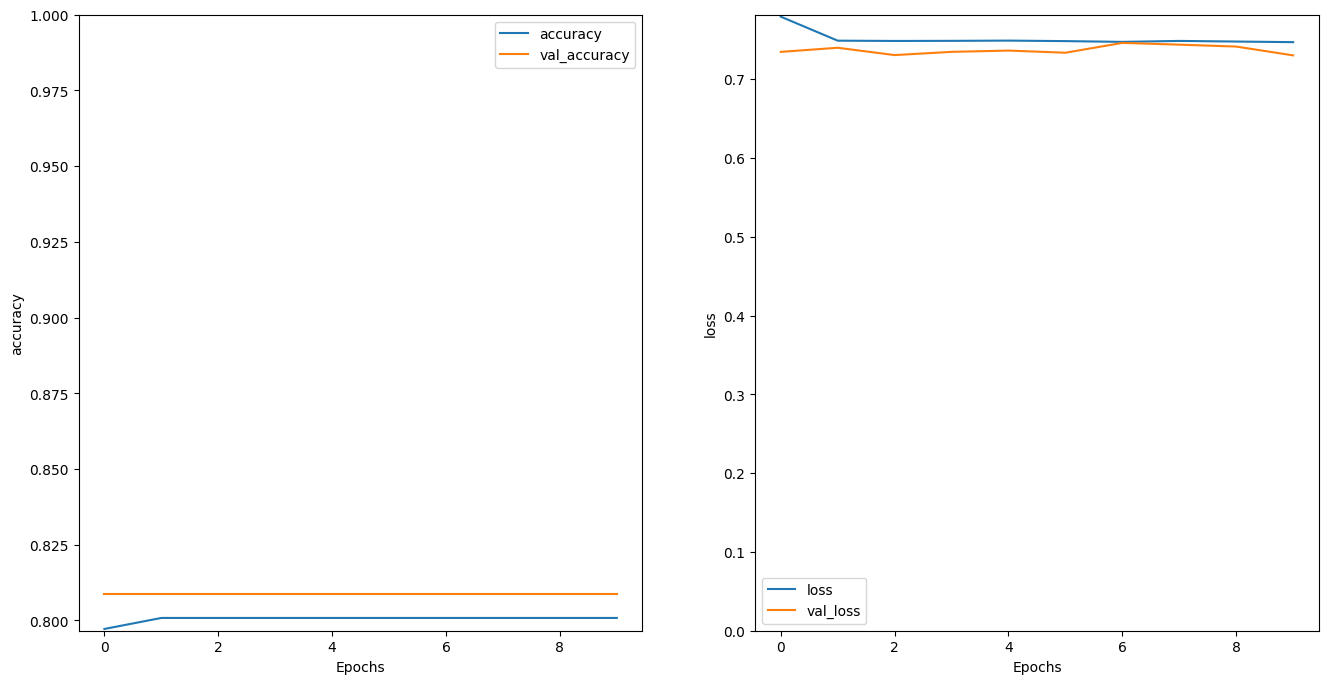

In [29]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# tokenize

In [30]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


2025-04-30 23:35:08.386433: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.8050 - loss: 0.7584 - val_accuracy: 0.8672 - val_loss: 0.3601
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.8892 - loss: 0.3538 - val_accuracy: 0.9198 - val_loss: 0.3035
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9197 - loss: 0.2740 - val_accuracy: 0.9198 - val_loss: 0.3044
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9278 - loss: 0.2455 - val_accuracy: 0.9375 - val_loss: 0.2243
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9347 - loss: 0.2169 - val_accuracy: 0.9422 - val_loss: 0.2067
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9408 - loss: 0.1942 - val_accuracy: 0.9453 - val_loss: 0.1986
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9510 - loss: 0.1695 - val_accuracy: 0.9521 - val_loss: 0.1774
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9502 - loss: 0.1728 - val_accurac

Test Loss: 0.16479842364788055
Test Accuracy: 0.9523202180862427


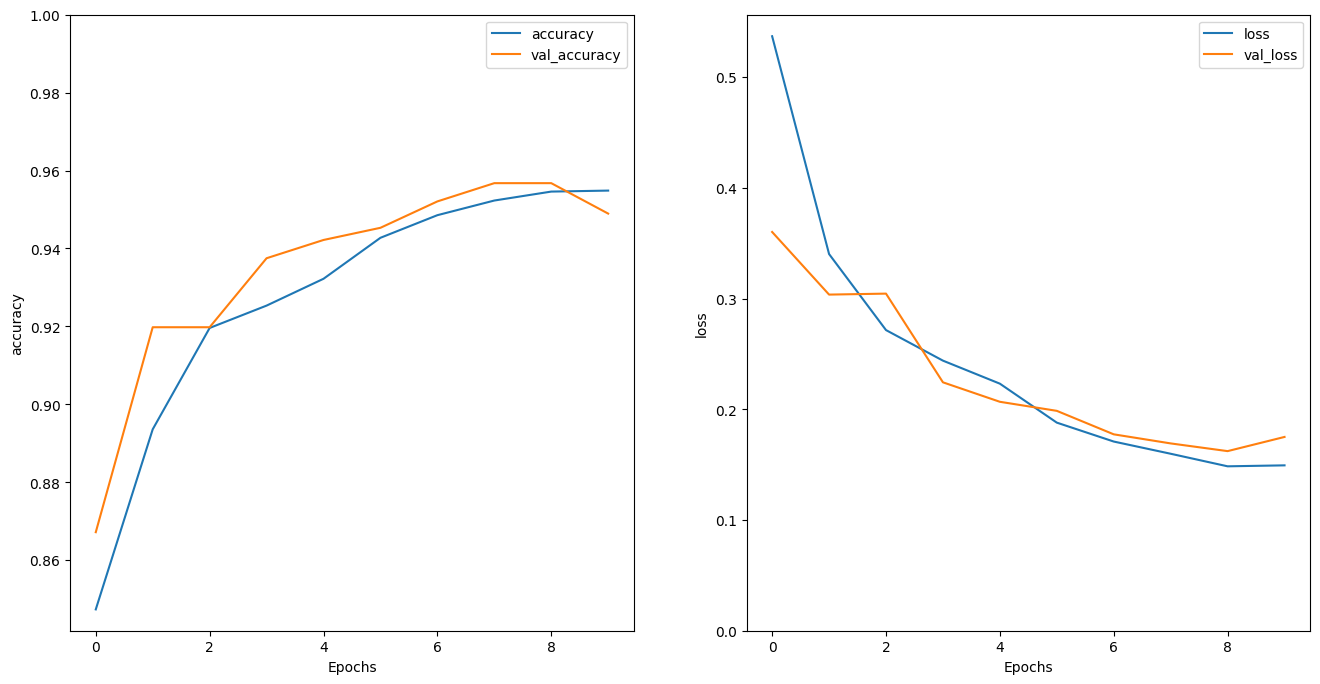

In [31]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)